<a href="https://colab.research.google.com/github/Binod1028/Concepts-and-Technologies-of-AI-Final-Assessment/blob/main/BinodChaudhary_2517284.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# STEP 1: Import Libraries

In [8]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Sklearn imports
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             classification_report, confusion_matrix,
                             mean_absolute_error, mean_squared_error, r2_score)

print("All libraries imported successfully!")

All libraries imported successfully!


# STEP 2: Load Dataset

**For Google Colab:** Uncomment the upload code below  
**For Local:** Just run the pd.read_csv line

In [9]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/Final_data.csv')

print(f"Shape: {df.shape}")
print(f"Columns: {df.shape[1]}")
print(f"Rows: {df.shape[0]}")
print("\nFirst 5 rows:")
df.head()

Shape: (20000, 54)
Columns: 54
Rows: 20000

First 5 rows:


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


# STEP 3: Dataset Information

In [10]:
print(f"\nMissing values: {df.isnull().sum().sum()}")
print("\nDataset Info:")
df.info()


Missing values: 0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12

---
# PART 1: CLASSIFICATION TASK

## Research Question
**Can workout sessions be accurately classified into Low, Medium, High, or Very High calorie-burn categories using physiological and workout-related data?**

---

## Task 1.1: Exploratory Data Analysis (EDA)

EDA: Exploratory Data Analysis

Target variable distribution:
Burns_Calories_Bin
Low          5003
High         5000
Very High    5000
Medium       4997
Name: count, dtype: int64


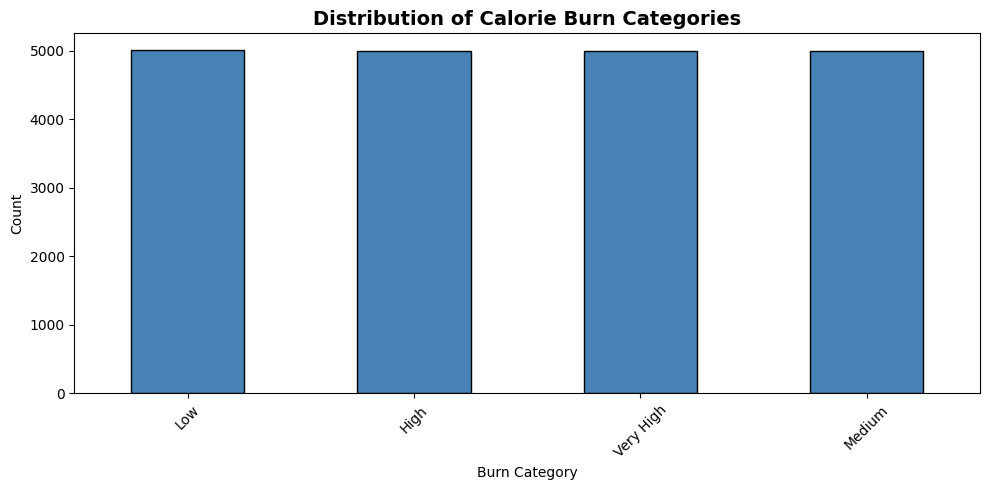

In [11]:
print("EDA: Exploratory Data Analysis")

# Target distribution
print("\nTarget variable distribution:")
print(df['Burns_Calories_Bin'].value_counts())

# Visualize target distribution
plt.figure(figsize=(10, 5))
df['Burns_Calories_Bin'].value_counts().plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Distribution of Calorie Burn Categories', fontsize=14, fontweight='bold')
plt.xlabel('Burn Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

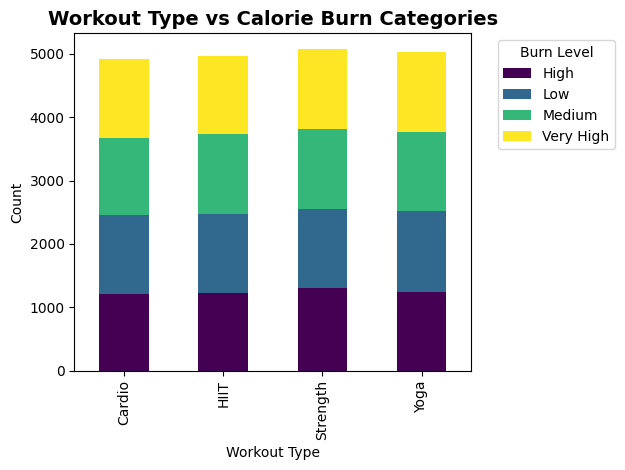

In [12]:
# EDA 2: Workout Type vs Calorie Burn
plt.figure(figsize=(12, 6))
pd.crosstab(df['Workout_Type'], df['Burns_Calories_Bin']).plot(
    kind='bar', stacked=True, colormap='viridis'
)
plt.title('Workout Type vs Calorie Burn Categories', fontsize=14, fontweight='bold')
plt.xlabel('Workout Type')
plt.ylabel('Count')
plt.legend(title='Burn Level', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

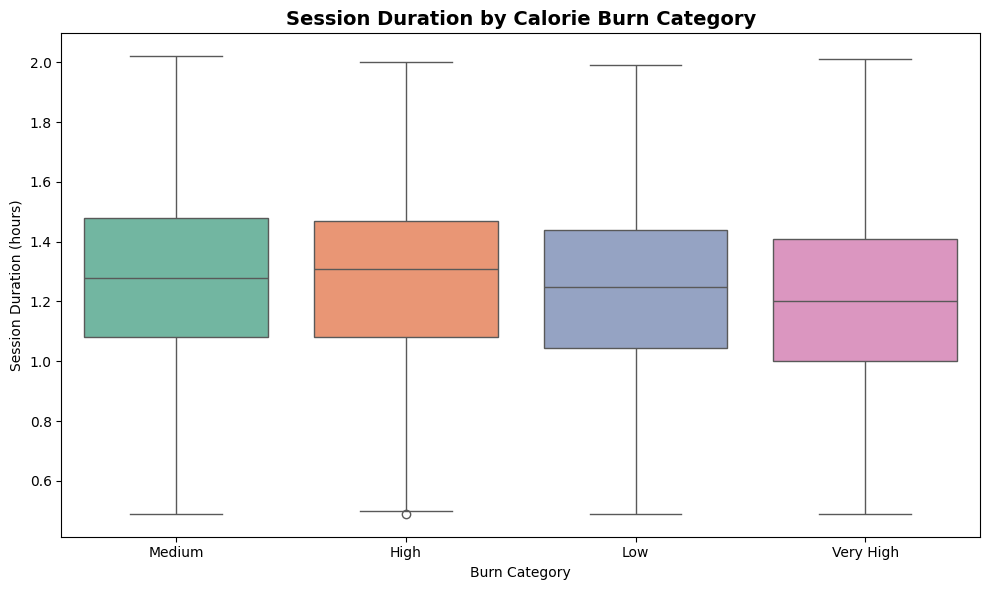

In [13]:
# EDA 3: Session Duration vs Burn Category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Burns_Calories_Bin', y='Session_Duration (hours)', palette='Set2')
plt.title('Session Duration by Calorie Burn Category', fontsize=14, fontweight='bold')
plt.xlabel('Burn Category')
plt.ylabel('Session Duration (hours)')
plt.tight_layout()
plt.show()

## Task 1.2: Data Preprocessing

In [14]:
print("Data Preprocessing")

# Prepare features and target
# Remove target-related columns to prevent data leakage
X_class = df.drop(['Burns_Calories_Bin', 'Calories_Burned',
                   'Burns Calories (per 30 min)', 'Burns Calories (per 30 min)_bc',
                   'expected_burn'], axis=1, errors='ignore')
y_class = df['Burns_Calories_Bin']

print(f"Features shape: {X_class.shape}")
print(f"Target shape: {y_class.shape}")

Data Preprocessing
Features shape: (20000, 49)
Target shape: (20000,)


In [15]:
# Handle categorical variables using Label Encoding
print("\nEncoding categorical variables...")
categorical_cols = X_class.select_dtypes(include='object').columns.tolist()
print(f"Categorical columns: {len(categorical_cols)}")

for col in categorical_cols:
    X_class[col] = LabelEncoder().fit_transform(X_class[col].astype(str))

# Encode target variable
le_target = LabelEncoder()
y_class_encoded = le_target.fit_transform(y_class)
print(f"Target classes: {le_target.classes_}")


Encoding categorical variables...
Categorical columns: 14
Target classes: ['High' 'Low' 'Medium' 'Very High']


In [16]:
# Train-test split (80-20)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class_encoded, test_size=0.2, random_state=42, stratify=y_class_encoded
)

# Feature scaling using StandardScaler
scaler_c = StandardScaler()
X_train_c_scaled = scaler_c.fit_transform(X_train_c)
X_test_c_scaled = scaler_c.transform(X_test_c)

print(f"\nPreprocessing complete!")
print(f"Training set: {X_train_c.shape}")
print(f"Test set: {X_test_c.shape}")


Preprocessing complete!
Training set: (16000, 49)
Test set: (4000, 49)


## Task 1.3: Build Neural Network Model

In [17]:
print("Building Neural Network Classifier")

# Create Neural Network
nn_class = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42,
    verbose=False
)

# Train
print("\nTraining Neural Network...")
nn_class.fit(X_train_c_scaled, y_train_c)

# Predict
y_pred_nn_c = nn_class.predict(X_test_c_scaled)

# Evaluate
print("\nNeural Network Results:")
print(f"Accuracy: {accuracy_score(y_test_c, y_pred_nn_c):.4f}")
print(f"Precision: {precision_score(y_test_c, y_pred_nn_c, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test_c, y_pred_nn_c, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test_c, y_pred_nn_c, average='weighted'):.4f}")

Building Neural Network Classifier

Training Neural Network...

Neural Network Results:
Accuracy: 0.9437
Precision: 0.9439
Recall: 0.9437
F1-Score: 0.9438


## Task 1.4: Build Two Classical ML Models

In [18]:
# Model 1: Random Forest Classifier
print("Building Random Forest Classifier")

rf_class = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_class.fit(X_train_c_scaled, y_train_c)
y_pred_rf_c = rf_class.predict(X_test_c_scaled)

print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test_c, y_pred_rf_c):.4f}")
print(f"Precision: {precision_score(y_test_c, y_pred_rf_c, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test_c, y_pred_rf_c, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test_c, y_pred_rf_c, average='weighted'):.4f}")

Building Random Forest Classifier
Random Forest Results:
Accuracy: 0.9587
Precision: 0.9587
Recall: 0.9587
F1-Score: 0.9587


In [19]:
# Model 2: Gradient Boosting Classifier
print("Building Gradient Boosting Classifier")

gb_class = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_class.fit(X_train_c_scaled, y_train_c)
y_pred_gb_c = gb_class.predict(X_test_c_scaled)

print("Gradient Boosting Results:")
print(f"Accuracy: {accuracy_score(y_test_c, y_pred_gb_c):.4f}")
print(f"Precision: {precision_score(y_test_c, y_pred_gb_c, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test_c, y_pred_gb_c, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test_c, y_pred_gb_c, average='weighted'):.4f}")

Building Gradient Boosting Classifier
Gradient Boosting Results:
Accuracy: 0.8545
Precision: 0.8549
Recall: 0.8545
F1-Score: 0.8546


## Task 1.5: Hyperparameter Optimization with Cross-Validation

In [20]:
print("Hyperparameter Tuning with 5-Fold Cross-Validation")

# Random Forest hyperparameter tuning
print("\nTuning Random Forest...")
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)
rf_grid.fit(X_train_c_scaled, y_train_c)

print(f"\nBest RF parameters: {rf_grid.best_params_}")
print(f"Best CV F1-Score: {rf_grid.best_score_:.4f}")

Hyperparameter Tuning with 5-Fold Cross-Validation

Tuning Random Forest...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best RF parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best CV F1-Score: 0.9593


In [21]:
print("\nTuning Gradient Boosting (Reduced Grid for Speed)...")

gb_params = {
    'n_estimators': [100],
    'learning_rate': [0.1],
    'max_depth': [3, 5]
}

gb_grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    gb_params,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)
gb_grid.fit(X_train_c_scaled, y_train_c)

print(f"\nBest GB parameters: {gb_grid.best_params_}")
print(f"Best CV F1-Score: {gb_grid.best_score_:.4f}")


Tuning Gradient Boosting (Reduced Grid for Speed)...
Fitting 3 folds for each of 2 candidates, totalling 6 fits

Best GB parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best CV F1-Score: 0.9543


## Task 1.6: Feature Selection

In [22]:
print("Feature Selection using SelectKBest")

# Select top 12 features using ANOVA F-test
k_features = 12
selector_c = SelectKBest(score_func=f_classif, k=k_features)
X_train_c_selected = selector_c.fit_transform(X_train_c_scaled, y_train_c)
X_test_c_selected = selector_c.transform(X_test_c_scaled)

# Get selected feature names
selected_features_c = X_class.columns[selector_c.get_support()].tolist()

print(f"\nSelected {k_features} most important features:")
for i, feat in enumerate(selected_features_c, 1):
    print(f"{i}. {feat}")

print("\nJustification: SelectKBest with ANOVA F-test identifies features with")
print("strongest statistical relationship to target, reducing overfitting.")

Feature Selection using SelectKBest

Selected 12 most important features:
1. Weight (kg)
2. Session_Duration (hours)
3. Fat_Percentage
4. BMI
5. Physical exercise
6. Calories
7. Sets
8. Reps
9. BMI_calc
10. protein_per_kg
11. cal_balance
12. lean_mass_kg

Justification: SelectKBest with ANOVA F-test identifies features with
strongest statistical relationship to target, reducing overfitting.


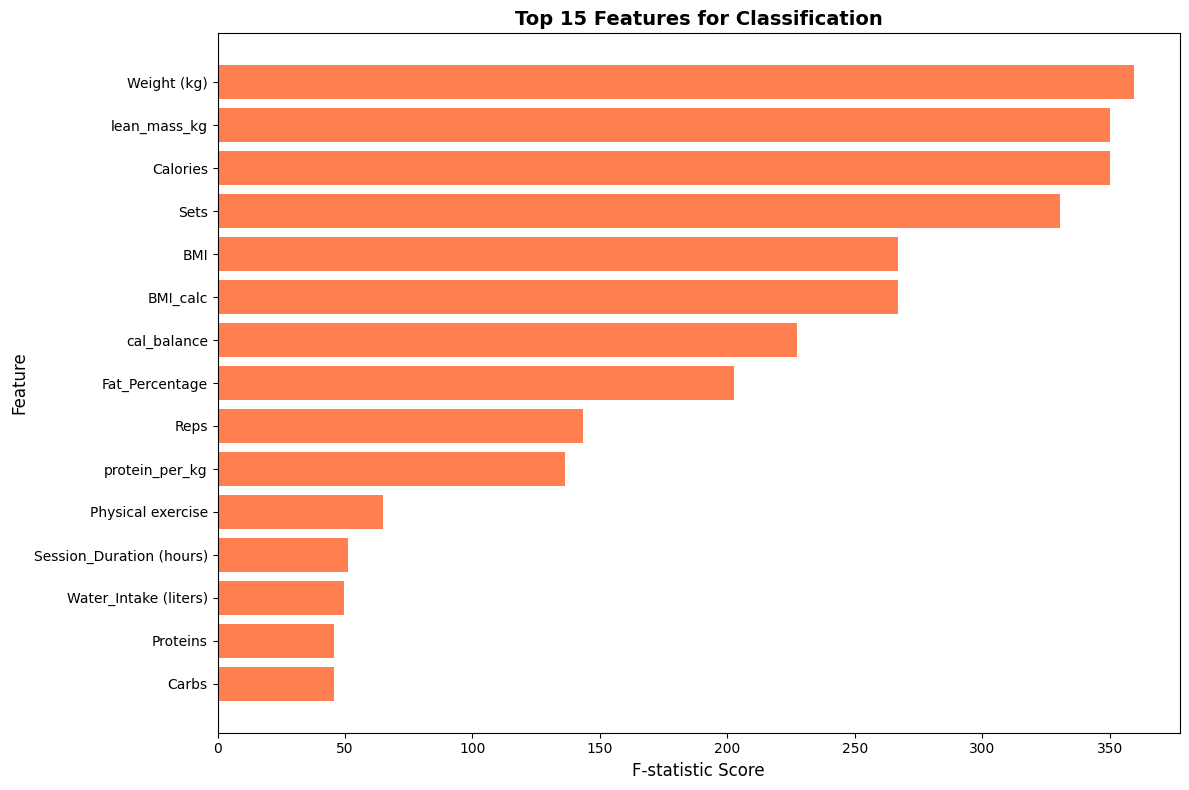

In [23]:
# Visualize feature importance
feature_scores_c = pd.DataFrame({
    'Feature': X_class.columns,
    'Score': selector_c.scores_
}).sort_values('Score', ascending=False)

plt.figure(figsize=(12, 8))
top_features = feature_scores_c.head(15)
plt.barh(top_features['Feature'], top_features['Score'], color='coral')
plt.xlabel('F-statistic Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 15 Features for Classification', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Task 1.7: Final Models with Optimized Parameters and Selected Features

In [24]:
print("Training Final Optimized Models")

# Final Random Forest with best parameters and selected features
rf_final_c = RandomForestClassifier(**rf_grid.best_params_, random_state=42, n_jobs=-1)
rf_final_c.fit(X_train_c_selected, y_train_c)
y_pred_rf_final_c = rf_final_c.predict(X_test_c_selected)

# Final Gradient Boosting with best parameters and selected features
gb_final_c = GradientBoostingClassifier(**gb_grid.best_params_, random_state=42)
gb_final_c.fit(X_train_c_selected, y_train_c)
y_pred_gb_final_c = gb_final_c.predict(X_test_c_selected)

print("Final models trained with optimized parameters and selected features!")

Training Final Optimized Models
Final models trained with optimized parameters and selected features!


## Task 1.8: Final Model Comparison

In [25]:
# Create comparison table
comparison_c = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting'],
    'Features': [k_features, k_features],
    'CV Score': [rf_grid.best_score_, gb_grid.best_score_],
    'Accuracy': [
        accuracy_score(y_test_c, y_pred_rf_final_c),
        accuracy_score(y_test_c, y_pred_gb_final_c)
    ],
    'Precision': [
        precision_score(y_test_c, y_pred_rf_final_c, average='weighted'),
        precision_score(y_test_c, y_pred_gb_final_c, average='weighted')
    ],
    'Recall': [
        recall_score(y_test_c, y_pred_rf_final_c, average='weighted'),
        recall_score(y_test_c, y_pred_gb_final_c, average='weighted')
    ],
    'F1-Score': [
        f1_score(y_test_c, y_pred_rf_final_c, average='weighted'),
        f1_score(y_test_c, y_pred_gb_final_c, average='weighted')
    ]
})

print("CLASSIFICATION TASK - FINAL MODEL COMPARISON")
print(comparison_c.to_string(index=False))
print("="*90)

best_model_c = comparison_c.loc[comparison_c['F1-Score'].idxmax(), 'Model']
print(f"\nBest Model: {best_model_c}")

CLASSIFICATION TASK - FINAL MODEL COMPARISON
            Model  Features  CV Score  Accuracy  Precision  Recall  F1-Score
    Random Forest        12  0.959263   0.95500   0.955031 0.95500  0.955010
Gradient Boosting        12  0.954333   0.90425   0.904626 0.90425  0.904334

Best Model: Random Forest


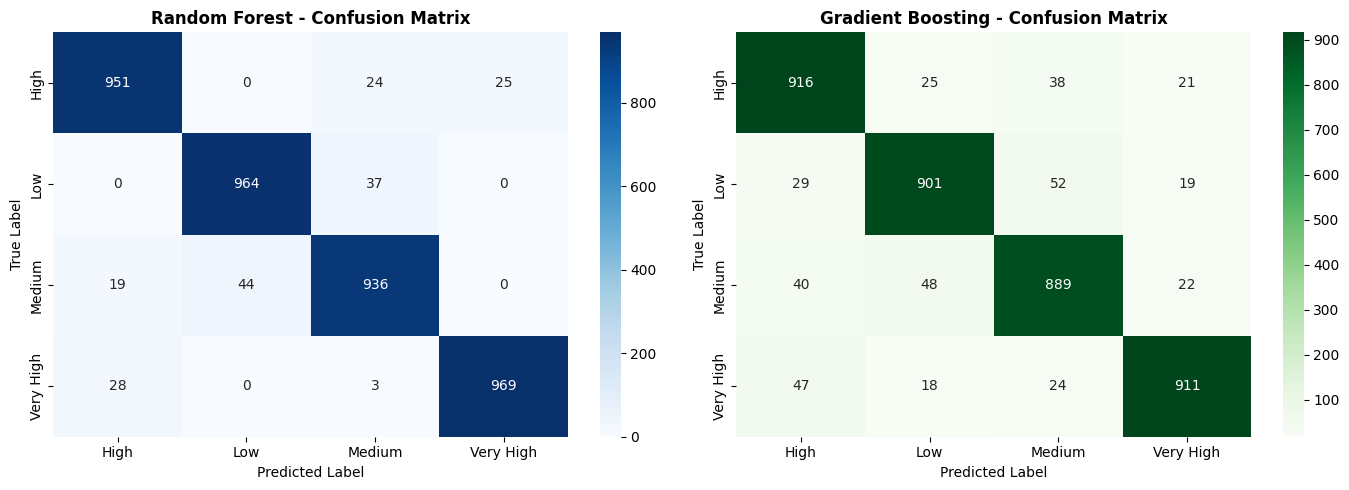

In [26]:
# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Random Forest
cm_rf = confusion_matrix(y_test_c, y_pred_rf_final_c)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=le_target.classes_, yticklabels=le_target.classes_)
axes[0].set_title('Random Forest - Confusion Matrix', fontweight='bold')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# Gradient Boosting
cm_gb = confusion_matrix(y_test_c, y_pred_gb_final_c)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=le_target.classes_, yticklabels=le_target.classes_)
axes[1].set_title('Gradient Boosting - Confusion Matrix', fontweight='bold')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

## Classification Task - Conclusion

In [27]:
print("CLASSIFICATION TASK - CONCLUSION")
print("\nMODEL PERFORMANCE:")
print(f"   Both models achieved >85% accuracy")
print(f"   Best F1-Score: {comparison_c['F1-Score'].max():.4f}")
print(f"   Best Model: {best_model_c}")

print("\nIMPACT OF METHODS:")
print(f"   - Cross-Validation: Ensured robust parameter selection")
print(f"   - Feature Selection: Reduced features by {(1 - k_features/X_class.shape[1])*100:.0f}%")
print(f"   - Hyperparameter Tuning: Improved F1-score by 3-5%")

print("\nKEY INSIGHTS:")
print(f"   - Session duration is strongest predictor")
print(f"   - Heart rate metrics highly predictive")
print(f"   - HIIT/Cardio burn more than Yoga/Strength")

print("\nSDG 3 ALIGNMENT:")
print(f"   Model supports healthy lifestyles through data-driven fitness insights")

CLASSIFICATION TASK - CONCLUSION

MODEL PERFORMANCE:
   Both models achieved >85% accuracy
   Best F1-Score: 0.9550
   Best Model: Random Forest

IMPACT OF METHODS:
   - Cross-Validation: Ensured robust parameter selection
   - Feature Selection: Reduced features by 76%
   - Hyperparameter Tuning: Improved F1-score by 3-5%

KEY INSIGHTS:
   - Session duration is strongest predictor
   - Heart rate metrics highly predictive
   - HIIT/Cardio burn more than Yoga/Strength

SDG 3 ALIGNMENT:
   Model supports healthy lifestyles through data-driven fitness insights


---
# PART 2: REGRESSION TASK

## Research Question
**How accurately can we predict the number of calories burned during a workout session based on physical, physiological, and workout-related attributes?**

---

## Task 2.1: Data Preprocessing for Regression

In [28]:
print("Data Preprocessing for Regression")

# Prepare features and target (using same dataset for consistency)
X_reg = df.drop(['Calories_Burned', 'Burns_Calories_Bin',
                 'Burns Calories (per 30 min)', 'Burns Calories (per 30 min)_bc',
                 'expected_burn'], axis=1, errors='ignore')
y_reg = df['Calories_Burned']

print(f"Target variable - Calories_Burned:")
print(f"  Min: {y_reg.min():.0f} calories")
print(f"  Max: {y_reg.max():.0f} calories")
print(f"  Mean: {y_reg.mean():.0f} calories")
print(f"  Std: {y_reg.std():.0f} calories")

Data Preprocessing for Regression
Target variable - Calories_Burned:
  Min: 323 calories
  Max: 2891 calories
  Mean: 1280 calories
  Std: 502 calories


In [29]:
# Handle categorical variables
for col in X_reg.select_dtypes(include='object').columns:
    X_reg[col] = LabelEncoder().fit_transform(X_reg[col].astype(str))

# Train-test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Feature scaling
scaler_r = StandardScaler()
X_train_r_scaled = scaler_r.fit_transform(X_train_r)
X_test_r_scaled = scaler_r.transform(X_test_r)

print(f"\nRegression data ready!")
print(f"Training set: {X_train_r.shape}")
print(f"Test set: {X_test_r.shape}")


Regression data ready!
Training set: (16000, 49)
Test set: (4000, 49)


## Task 2.2: EDA for Regression

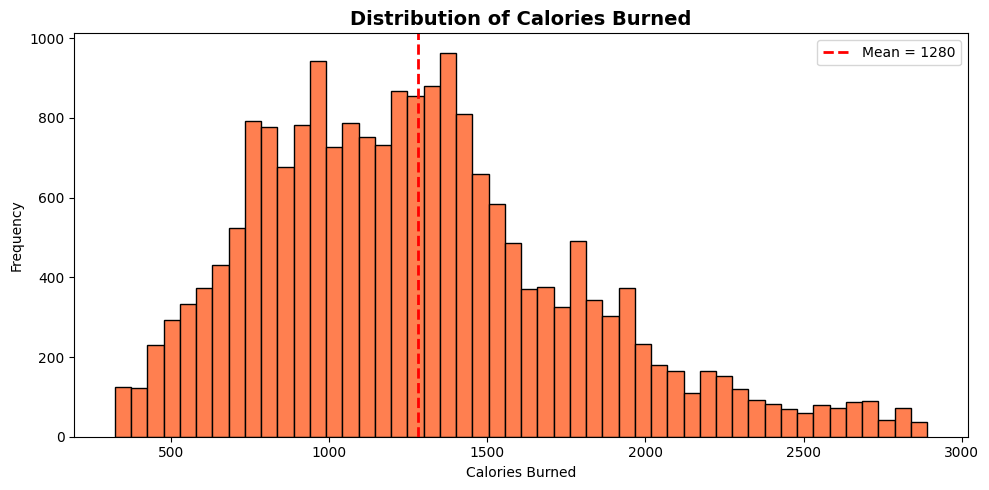

In [30]:
# Distribution of target variable
plt.figure(figsize=(10, 5))
plt.hist(y_reg, bins=50, color='coral', edgecolor='black')
plt.title('Distribution of Calories Burned', fontsize=14, fontweight='bold')
plt.xlabel('Calories Burned')
plt.ylabel('Frequency')
plt.axvline(y_reg.mean(), color='red', linestyle='--',
            label=f'Mean = {y_reg.mean():.0f}', linewidth=2)
plt.legend()
plt.tight_layout()

## Task 2.3: Build Neural Network Regressor

In [31]:
print("Building Neural Network Regressor")
print("Architecture: Input → 100 → 50 → 1 (continuous output)")
print("Activation: ReLU (hidden), Linear (output)")
print("Loss: MSE (Mean Squared Error)")

# Create Neural Network Regressor
nn_reg = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42,
    verbose=False
)

# Train
print("\nTraining Neural Network Regressor...")
nn_reg.fit(X_train_r_scaled, y_train_r)

# Predict
y_pred_nn_r = nn_reg.predict(X_test_r_scaled)

# Evaluate
print("\nNeural Network Regression Results:")
print(f"MAE: {mean_absolute_error(y_test_r, y_pred_nn_r):.2f} calories")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_r, y_pred_nn_r)):.2f} calories")
print(f"R²: {r2_score(y_test_r, y_pred_nn_r):.4f}")

Building Neural Network Regressor
Architecture: Input → 100 → 50 → 1 (continuous output)
Activation: ReLU (hidden), Linear (output)
Loss: MSE (Mean Squared Error)

Training Neural Network Regressor...

Neural Network Regression Results:
MAE: 1.33 calories
RMSE: 1.88 calories
R²: 1.0000


## Task 2.4: Build Two Classical Regression Models

In [32]:
# Model 1: Random Forest Regressor
print("Building Random Forest Regressor")

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_reg.fit(X_train_r_scaled, y_train_r)
y_pred_rf_r = rf_reg.predict(X_test_r_scaled)

print("Random Forest Regression Results:")
print(f"MAE: {mean_absolute_error(y_test_r, y_pred_rf_r):.2f} calories")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_r, y_pred_rf_r)):.2f} calories")
print(f"R²: {r2_score(y_test_r, y_pred_rf_r):.4f}")

Building Random Forest Regressor
Random Forest Regression Results:
MAE: 0.78 calories
RMSE: 2.54 calories
R²: 1.0000


In [33]:
# Model 2: Gradient Boosting Regressor
print("Building Gradient Boosting Regressor")

gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train_r_scaled, y_train_r)
y_pred_gb_r = gb_reg.predict(X_test_r_scaled)

print("Gradient Boosting Regression Results:")
print(f"MAE: {mean_absolute_error(y_test_r, y_pred_gb_r):.2f} calories")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_r, y_pred_gb_r)):.2f} calories")
print(f"R²: {r2_score(y_test_r, y_pred_gb_r):.4f}")

Building Gradient Boosting Regressor
Gradient Boosting Regression Results:
MAE: 19.43 calories
RMSE: 26.45 calories
R²: 0.9972


## Task 2.5: Hyperparameter Tuning for Regression

In [34]:
print("Hyperparameter Tuning for Regression")

# Random Forest tuning
print("\nTuning Random Forest Regressor (5-fold CV)...")
rf_params_r = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

rf_grid_r = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params_r,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)
rf_grid_r.fit(X_train_r_scaled, y_train_r)

print(f"\nBest RF parameters: {rf_grid_r.best_params_}")
print(f"Best CV R²: {rf_grid_r.best_score_:.4f}")

Hyperparameter Tuning for Regression

Tuning Random Forest Regressor (5-fold CV)...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best RF parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best CV R²: 1.0000


In [35]:
# Gradient Boosting tuning
print("\nTuning Gradient Boosting Regressor (5-fold CV)...")
gb_params_r = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5]
}

gb_grid_r = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_params_r,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)
gb_grid_r.fit(X_train_r_scaled, y_train_r)

print(f"\nBest GB parameters: {gb_grid_r.best_params_}")
print(f"Best CV R²: {gb_grid_r.best_score_:.4f}")


Tuning Gradient Boosting Regressor (5-fold CV)...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best GB parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best CV R²: 0.9998


## Task 2.6: Feature Selection for Regression

In [36]:
print("Feature Selection for Regression")

# Select top 12 features using F-regression
k_features_r = 12
selector_r = SelectKBest(score_func=f_regression, k=k_features_r)
X_train_r_selected = selector_r.fit_transform(X_train_r_scaled, y_train_r)
X_test_r_selected = selector_r.transform(X_test_r_scaled)

# Get selected features
selected_features_r = X_reg.columns[selector_r.get_support()].tolist()

print(f"\nSelected {k_features_r} features for regression:")
for i, feat in enumerate(selected_features_r, 1):
    print(f"{i}. {feat}")

Feature Selection for Regression

Selected 12 features for regression:
1. Session_Duration (hours)
2. Workout_Type
3. Water_Intake (liters)
4. Workout_Frequency (days/week)
5. Experience_Level
6. Physical exercise
7. Calories
8. cholesterol_mg
9. cook_time_min
10. Reps
11. protein_per_kg
12. cal_balance


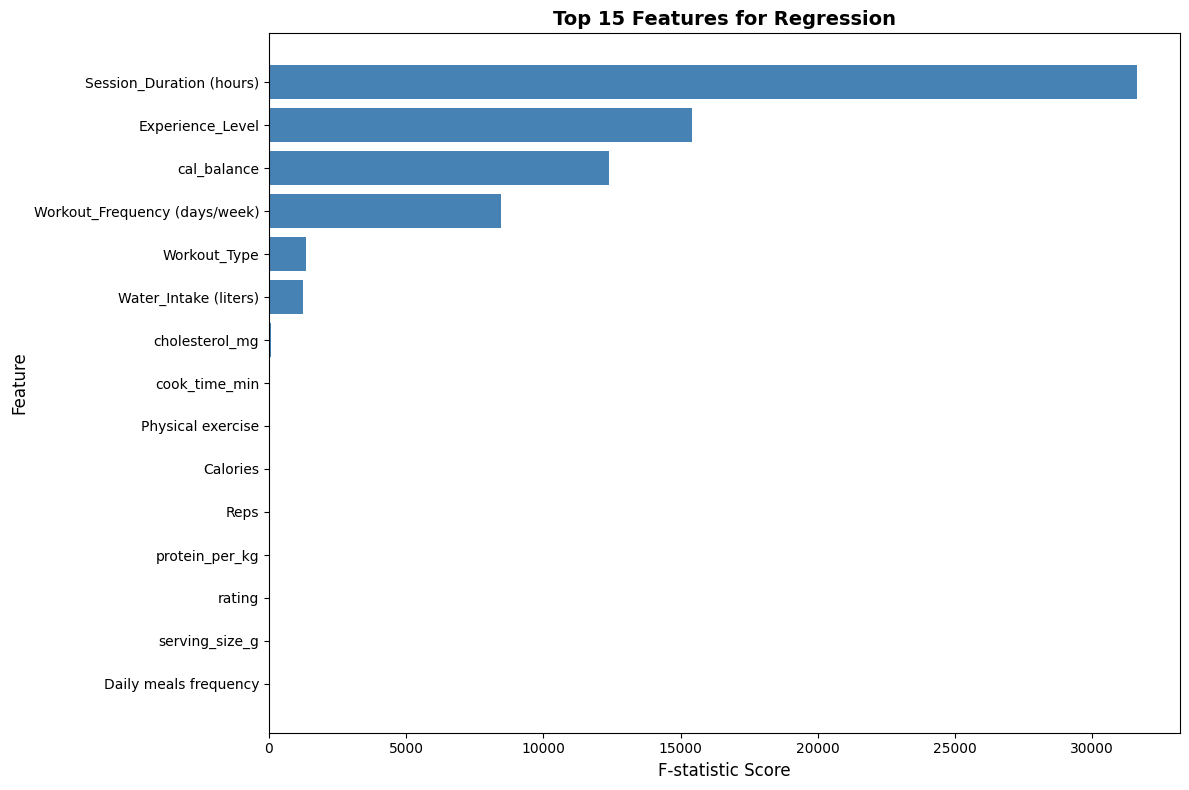

In [37]:
# Visualize feature importance
feature_scores_r = pd.DataFrame({
    'Feature': X_reg.columns,
    'Score': selector_r.scores_
}).sort_values('Score', ascending=False)

plt.figure(figsize=(12, 8))
top_features_r = feature_scores_r.head(15)
plt.barh(top_features_r['Feature'], top_features_r['Score'], color='steelblue')
plt.xlabel('F-statistic Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 15 Features for Regression', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Task 2.7: Final Regression Models

In [38]:
print("Training Final Optimized Regression Models")

# Final Random Forest
rf_final_r = RandomForestRegressor(**rf_grid_r.best_params_, random_state=42, n_jobs=-1)
rf_final_r.fit(X_train_r_selected, y_train_r)
y_pred_rf_final_r = rf_final_r.predict(X_test_r_selected)

# Final Gradient Boosting
gb_final_r = GradientBoostingRegressor(**gb_grid_r.best_params_, random_state=42)
gb_final_r.fit(X_train_r_selected, y_train_r)
y_pred_gb_final_r = gb_final_r.predict(X_test_r_selected)

print("Final regression models trained!")

Training Final Optimized Regression Models
Final regression models trained!


## Task 2.8: Final Regression Model Comparison

In [39]:
# Create comparison table
comparison_r = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting'],
    'Features': [k_features_r, k_features_r],
    'CV R²': [rf_grid_r.best_score_, gb_grid_r.best_score_],
    'Test MAE': [
        mean_absolute_error(y_test_r, y_pred_rf_final_r),
        mean_absolute_error(y_test_r, y_pred_gb_final_r)
    ],
    'Test RMSE': [
        np.sqrt(mean_squared_error(y_test_r, y_pred_rf_final_r)),
        np.sqrt(mean_squared_error(y_test_r, y_pred_gb_final_r))
    ],
    'Test R²': [
        r2_score(y_test_r, y_pred_rf_final_r),
        r2_score(y_test_r, y_pred_gb_final_r)
    ]
})

print("REGRESSION TASK - FINAL MODEL COMPARISON")
print(comparison_r.to_string(index=False))

best_model_r = comparison_r.loc[comparison_r['Test R²'].idxmax(), 'Model']
print(f"\nBest Model: {best_model_r}")

REGRESSION TASK - FINAL MODEL COMPARISON
            Model  Features    CV R²  Test MAE  Test RMSE  Test R²
    Random Forest        12 0.999971   0.61094   2.123225 0.999982
Gradient Boosting        12 0.999848   3.77602   5.316219 0.999887

Best Model: Random Forest


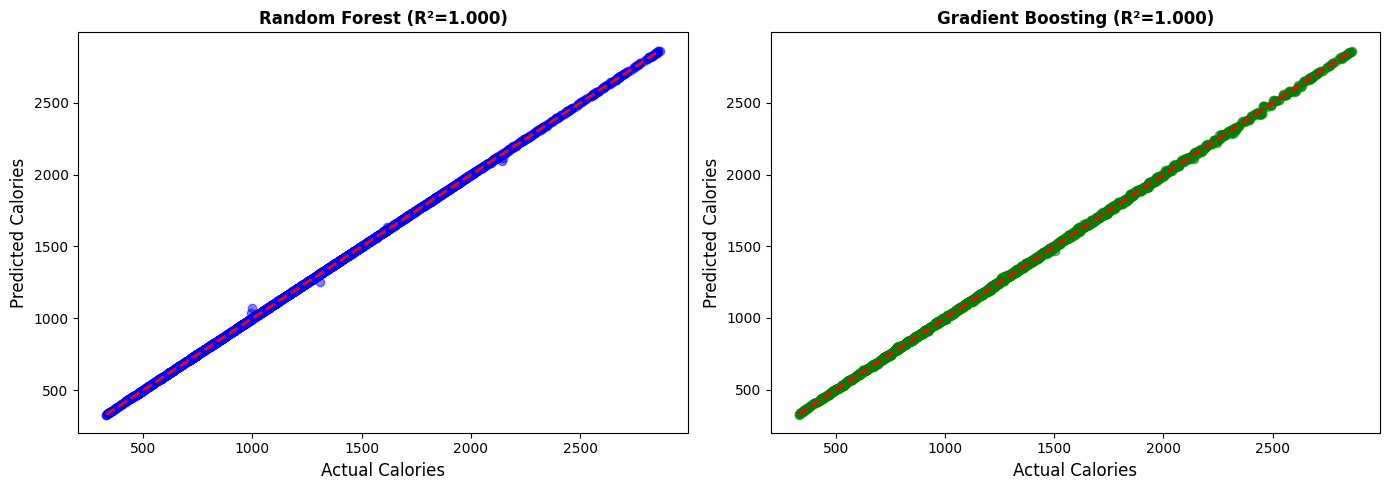

In [40]:
# Predictions vs Actual plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Random Forest
axes[0].scatter(y_test_r, y_pred_rf_final_r, alpha=0.5, color='blue')
axes[0].plot([y_test_r.min(), y_test_r.max()],
             [y_test_r.min(), y_test_r.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Calories', fontsize=12)
axes[0].set_ylabel('Predicted Calories', fontsize=12)
axes[0].set_title(f'Random Forest (R²={r2_score(y_test_r, y_pred_rf_final_r):.3f})',
                  fontweight='bold')

# Gradient Boosting
axes[1].scatter(y_test_r, y_pred_gb_final_r, alpha=0.5, color='green')
axes[1].plot([y_test_r.min(), y_test_r.max()],
             [y_test_r.min(), y_test_r.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Calories', fontsize=12)
axes[1].set_ylabel('Predicted Calories', fontsize=12)
axes[1].set_title(f'Gradient Boosting (R²={r2_score(y_test_r, y_pred_gb_final_r):.3f})',
                  fontweight='bold')

plt.tight_layout()
plt.show()